[View in Colaboratory](https://colab.research.google.com/github/cameronmalloy/ESPM155AC/blob/master/ESPM155ACProject.ipynb)

In [0]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [0]:
from google.colab import files
uploaded = files.upload()

Saving non_students.csv to non_students.csv
Saving students.csv to students.csv


In [0]:
students = pd.read_table('students.csv', sep=',')
non_students = pd.read_table('non_students.csv', sep=',')

In [0]:
sp = np.array(students['Prices'])
nsp = np.array(non_students['Prices'])

In [0]:
data = pd.concat([students, non_students])

In [0]:
#Average prices around students:
sp_avg = np.average(sp)
sp_avg

1.4923664122137406

In [0]:
#Average prices not around students:
nsp_avg = np.average(nsp)
nsp_avg

1.6104651162790697

In [0]:
def prop_one(arr):
  """Returns the proportion of 1's in an array"""
  arr_ones = arr == 1
  return np.count_nonzero(arr_ones) / len(arr)

In [0]:
#Proportion of 1$ restaurants around students
sp_ones = prop_one(sp)
sp_ones

0.5419847328244275

In [0]:
#Proportion of 1$ restaurants not around students
nsp_ones = prop_one(nsp)
nsp_ones

0.42441860465116277

**Null:** The distribution of prices between students and non-student regions is the same.

**Alt 1:** The student's regions have a lower price in restaurants on average than the non-student regions.

**Alt 2:** The student's regions have a higher percentage of 1 $ restaurants than the non-student regions.

In [0]:
avg_price_obs = sp_avg - nsp_avg
one_dollar_obs = sp_ones - nsp_ones

In [0]:
prices_stat = np.array([0])
one_dollars = np.array([0])
sample_size = len(data['Prices'])

for _ in np.arange(20000):
  shuffled = data.sample(sample_size)
  prices = np.array(shuffled['Prices'])
  students = prices[:len(sp)]
  non_students = prices[len(sp):]
  prices_stat = np.append(prices_stat, np.mean(students) - np.mean(non_students))
  one_dollars = np.append(one_dollars, (np.count_nonzero(students == 1) / len(students)) - (np.count_nonzero(non_students == 1) / len(non_students)))
  


Text(0,0.5,'Percent Difference')

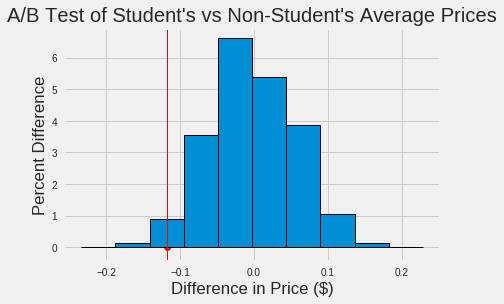

In [0]:
plt.hist(prices_stat, normed=True, edgecolor='black', linewidth=1)
plt.scatter(avg_price_obs, 0, color='red', s=40)
plt.axvline(avg_price_obs, 0, 12, color='red', linewidth=1)
plt.title("A/B Test of Student's vs Non-Student's Average Prices")
plt.xlabel("Difference in Price ($)")
plt.ylabel("Percent Difference")

In [0]:
avg_prices_p_value = np.count_nonzero(prices_stat <= avg_price_obs) / len(prices_stat)
avg_prices_p_value

0.021648917554122293

Text(0,0.5,'Percent Difference')

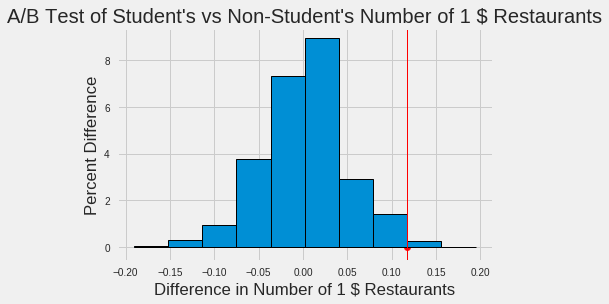

In [0]:
plt.hist(one_dollars, normed=True, edgecolor='black', linewidth=1)
plt.scatter(one_dollar_obs, 0, color='red', s=40)
plt.axvline(one_dollar_obs, 0, 12, color='red', linewidth=1)
plt.title("A/B Test of Student's vs Non-Student's Number of 1 $ Restaurants")
plt.xlabel("Difference in Number of 1 $ Restaurants")
plt.ylabel("Percent Difference")

In [0]:
one_dollars_p_value = np.count_nonzero(one_dollars >= one_dollar_obs) / len(one_dollars)
one_dollars_p_value

0.01079946002699865

In [0]:
 1#@Source: Berkeley DataScience Library
def sample_proportions(sample_size, probabilities):
  """Returns the proportion of random draws for each outcome in a distribution"""
  return np.random.multinomial(sample_size, probabilities) / sample_size

To determine whether the average price was due to random chance:

**Null:** Around Berkeley, the average price is around 1.6 and 1.5 was due to random chance

**Alt:** Closer to students, the average price was lower than the rest of Berkeley and the 1.5 was not due to random chance

In [0]:
nsp_ones_prop = np.count_nonzero(nsp == 1) / len(nsp)
nsp_twos_prop = np.count_nonzero(nsp == 2) / len(nsp)
nsp_threes_prop = np.count_nonzero(nsp == 3) / len(nsp)
nsp_fours_prop = np.count_nonzero(nsp == 4) / len(nsp)
nsp_props = [nsp_ones_prop, nsp_twos_prop, nsp_threes_prop, nsp_fours_prop]
nsp_props

[0.42441860465116277,
 0.5465116279069767,
 0.023255813953488372,
 0.005813953488372093]

In [0]:
avg_price_props = np.array([0])
sample_size = len(sp)

for _ in np.arange(20000):
  test_prices_arr = []
  test_props = sample_proportions(sample_size, nsp_props)
  total = test_props * [sample_size, sample_size, sample_size, sample_size]
  total = total * [1, 2, 3, 4]
  avg_price_props = np.append(avg_price_props, (np.sum(total) / sample_size))
  
avg_price_props = avg_price_props[1:]
avg_price_props


array([1.58015267, 1.60687023, 1.56870229, ..., 1.59923664, 1.61450382,
       1.62977099])

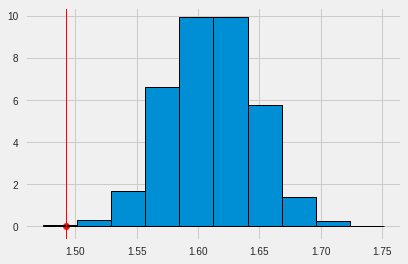

In [0]:
plt.hist(avg_price_props, normed=True, edgecolor='black', linewidth=1)
plt.scatter(sp_awesome, 0, color='red', s=40)
plt.axvline(sp_awesome, 0, 12, color='red', linewidth=1)
#plt.plot([low_bound, up_bound], [0, 0], color='yellow', lw=3, zorder=1)

In [0]:
p_value_avg_prices = np.count_nonzero(avg_price_props <= sp_awesome) / len(avg_price_props)
p_value_avg_prices

0.00055

To determine whether the amount of 1 $ restaurants is not due to random chance, we do a statistical experiment:

**Null:** Around Berkeley, the amount of 1 $ restaurants is around 42% and the 54% was due to random chance

**Alt:** The amount of 1 $ restaurants around students is higher than the rest of Berkeley and the 54% is not due to random chance

**Test Statistic:** The proportion of 1 $ restaurants

In [0]:
null_probs = [nsp_ones, 1 - nsp_ones] #[.42, .56] roughly, left represents what the null says, .56 is just to add to 1
one_dollar_props = np.array([0])
sample_size = len(sp)

for _ in np.arange(50000):
  stat = sample_proportions(sample_size, null_probs) # this basically randomly selects either the .42 or .56 side randomly based on the
                                                     # .42 and .56 weights len(sp) times, then gives the proportion of how many times it picked .42 and proportion of .56
  one_dollar_props = np.append(one_dollar_props, stat[0]) #take the first element because it returns an array of 2 proportions, 0th elt corresponds to .42
  
one_dollar_props = one_dollar_props[1:]

In [0]:
one_dollar_props

array([0.41984733, 0.44656489, 0.38931298, ..., 0.4389313 , 0.4351145 ,
       0.42366412])

In [0]:
up_bound = np.percentile(one_dollar_props, 99.5)
up_bound

0.5038167938931297

In [0]:
low_bound = np.percentile(one_dollar_props, 0.5)

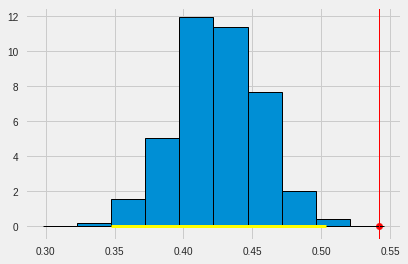

In [0]:
plt.hist(one_dollar_props, normed=True, edgecolor='black', linewidth=1)
plt.scatter(sp_ones, 0, color='red', s=40)
plt.axvline(sp_ones, 0, 12, color='red', linewidth=1)
#plt.plot([low_bound, up_bound], [0, 0], color='yellow', lw=3, zorder=1)

In [0]:
p_value = np.count_nonzero(one_dollar_props >= sp_ones) / len(one_dollar_props)
p_value

8e-05